 # ClusterAI - 2020
## TP integrador - Primera parte
### Pre Processing y ML - Obras Públicas
#### Grupo_08 - Septiembre 2020

In [2]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Una vez que descargamos el dataset procedemos a leerlo
obras = pd.read_excel('obras_publicas.xlsx')

In [4]:
obras.head()

,Unnamed: 0,etapa,tipo,plazo_años,monto_miles,comuna
0,0,Finalizada,Escuelas,De 2 a 3 años,67065.700,12
1,1,Finalizada,Espacio Público,De 1 a 2 años,9950.017,12
2,2,Finalizada,Espacio Público,De 1 a 2 años,36942.632,1
3,3,Finalizada,Espacio Público,De 2 a 3 años,26938.294,1
4,4,Finalizada,Vivienda,Menos de 1 año,6990.315,8


In [5]:
obras['etapa'].replace('En ejecución',np.nan,inplace=True)
obras['etapa'].replace('En licitación',np.nan,inplace=True)

In [6]:
obras.dropna(subset=['etapa'],how='any',inplace=True,axis='index')
filas=np.shape(obras)[0]
print(f'Filas:{filas}')

Filas:883


# Objetivo del Proyecto:
Predicción en función de la comuna, el tipo de obra a realizar y el monto del contrato, el tiempo de realización de la misma

## TARGET

In [7]:
# Definimos primero nuestro target, al cual lo guardaremos en una variable y

y = obras.iloc[:,3]
y

0       De 2 a 3 años
1       De 1 a 2 años
2       De 1 a 2 años
3       De 2 a 3 años
4      Menos de 1 año
            ...      
929    Menos de 1 año
930    Menos de 1 año
931    Menos de 1 año
932    Menos de 1 año
933    Menos de 1 año
Name: plazo_años, Length: 883, dtype: object

In [8]:
# Al ser una variable categórica la vamos a transformar

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
obras['Encoded'] = y

## FEATURES

In [9]:
tipo_obra = pd.get_dummies(obras.tipo)
obras = obras.join(tipo_obra)
obras

,Unnamed: 0,etapa,tipo,plazo_años,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,0,Finalizada,Escuelas,De 2 a 3 años,67065.700,12,1,0,1,0,0,0,0,0
1,1,Finalizada,Espacio Público,De 1 a 2 años,9950.017,12,0,0,0,1,0,0,0,0
2,2,Finalizada,Espacio Público,De 1 a 2 años,36942.632,1,0,0,0,1,0,0,0,0
3,3,Finalizada,Espacio Público,De 2 a 3 años,26938.294,1,1,0,0,1,0,0,0,0
4,4,Finalizada,Vivienda,Menos de 1 año,6990.315,8,2,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,1111,Finalizada,Espacio Público,Menos de 1 año,2325.368,8,2,0,0,1,0,0,0,0
930,1112,Finalizada,Espacio Público,Menos de 1 año,1984.627,8,2,0,0,1,0,0,0,0
931,1114,Finalizada,Espacio Público,Menos de 1 año,6557.067,9,2,0,0,1,0,0,0,0
932,1115,Finalizada,Espacio Público,Menos de 1 año,22279.428,15,2,0,0,1,0,0,0,0


In [10]:
x = obras.iloc[:,4:]
x

,monto_miles,comuna,Encoded,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,1,0,1,0,0,0,0,0
1,9950.017,12,0,0,0,1,0,0,0,0
2,36942.632,1,0,0,0,1,0,0,0,0
3,26938.294,1,1,0,0,1,0,0,0,0
4,6990.315,8,2,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
929,2325.368,8,2,0,0,1,0,0,0,0
930,1984.627,8,2,0,0,1,0,0,0,0
931,6557.067,9,2,0,0,1,0,0,0,0
932,22279.428,15,2,0,0,1,0,0,0,0


In [11]:
# Recordamos que Encoded es el dummie generado para nuestro target (sacamos por exclusión)
x = x.drop(['Encoded'],axis=1)
x

,monto_miles,comuna,Arquitectura,Escuelas,Espacio Público,Hidráulica e Infraestructura,Salud,Transporte,Vivienda
0,67065.700,12,0,1,0,0,0,0,0
1,9950.017,12,0,0,1,0,0,0,0
2,36942.632,1,0,0,1,0,0,0,0
3,26938.294,1,0,0,1,0,0,0,0
4,6990.315,8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
929,2325.368,8,0,0,1,0,0,0,0
930,1984.627,8,0,0,1,0,0,0,0
931,6557.067,9,0,0,1,0,0,0,0
932,22279.428,15,0,0,1,0,0,0,0


## PRE PROCESAMIENTO

In [12]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA, KernelPCA
from sklearn import decomposition

In [13]:
# Separamos el data set en train y test
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2, random_state=8)
print('El tamaño del "X" de entrenamiento es: ' + str(xtrain.shape))
print('Se corresponde con el "Y" de entrenamiento ' + str(ytrain.shape))

El tamaño del "X" de entrenamiento es: (706, 9)
Se corresponde con el "Y" de entrenamiento (706,)


In [14]:
# Estandarizamos nuestros datos de entrenamiento

scaler = preprocessing.StandardScaler().fit(xtrain)

In [15]:
# Luego de estandarizar, transformamos con la distribución obtenida del train set

xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

## ML

Se utilizarán distintos modelos, con distintos hiperparámetros para obtener aquel que mejor logre clasificar nuestro objetivo.


### Support Vector Classifier

In [16]:
# Definimos el clasificador

svc = SVC(probability=True)

param_svc={'kernel':('linear','rbf'),
           'C':[ 90, 100, 110, 120, 150],
           'gamma':[0.001, 0.1, 0.5, 1, 2, 5, 10]}
gs_svc=GridSearchCV(svc, param_grid=param_svc, refit=True,cv=5)
gs_svc.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [90, 100, 110, 120, 150],
                         'gamma': [0.001, 0.1, 0.5, 1, 2, 5, 10],
                         'kernel': ('linear', 'rbf')})

In [17]:
print ('Los mejores parámetros son: ',  gs_svc.best_params_)
print ('El score obtenido fue: ', gs_svc.best_score_)

Los mejores parámetros son:  {'C': 90, 'gamma': 0.5, 'kernel': 'rbf'}
El score obtenido fue:  0.800269703326341


In [18]:
ypred_svc=gs_svc.predict(xtest_scaled)
score_svc=accuracy_score(ytest,ypred_svc)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_svc)))

El accuracy obtenido fue de 0.77 


In [19]:
# Vamos a guardar los resultados y comparar al final

rdos = pd.DataFrame(columns=['Clasificador', 'Accuracy'])

In [20]:
rdos = rdos.append({'Clasificador':'SVC',
                   'Accuracy': score_svc}, ignore_index=True)

### KNN Classifier

In [21]:
knn = KNeighborsClassifier()

param_knn = {'n_neighbors': [1,2,5,10,15,20,50,100,150]}

gs_knn = GridSearchCV(knn, param_grid=param_knn,refit=True, cv=5)
gs_knn.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 15, 20, 50, 100, 150]})

In [22]:
print ('Los mejores parámetros son: ', gs_knn.best_params_)
print ('El score obtenido fue: ', gs_knn.best_score_)
ypred_knn=gs_knn.predict(xtest_scaled)
score_knn=accuracy_score(ytest,ypred_knn)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_knn)))

Los mejores parámetros son:  {'n_neighbors': 5}
El score obtenido fue:  0.783258415742683
El accuracy obtenido fue de 0.77 


In [23]:
rdos = rdos.append({'Clasificador':'KNN',
                   'Accuracy': score_knn}, ignore_index=True)

In [24]:
iteraciones_knn = 50
acc_knn = np.zeros(iteraciones_knn)

In [26]:
for r in range(0,iteraciones_knn):
   
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(xtrain_scaled,ytrain)
    ypred_knn = neigh.predict(xtest_scaled)
    acc_knn[r] = accuracy_score(ytest, ypred_knn)

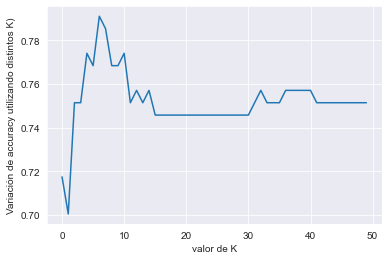

In [28]:
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K)")
sns.set_style('darkgrid')
plt.show()

In [36]:
param_knn2 = {'n_neighbors': [5,6,7,8]}

gs_knn2 = GridSearchCV(knn, param_grid=param_knn2,refit=True, cv=5)
gs_knn2.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8]})

In [37]:
print ('Los mejores parámetros son: ', gs_knn2.best_params_)
print ('El score obtenido fue: ', gs_knn2.best_score_)
ypred_knn2=gs_knn2.predict(xtest_scaled)
score_knn2=accuracy_score(ytest,ypred_knn)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_knn2)))

Los mejores parámetros son:  {'n_neighbors': 7}
El score obtenido fue:  0.7832584157426831
El accuracy obtenido fue de 0.79 


In [38]:
rdos = rdos.append({'Clasificador':'KNN_2',
                   'Accuracy': score_knn2}, ignore_index=True)

### Random Forest Classifier

In [32]:
rfr = RandomForestClassifier()

param_rfr = {'n_estimators':[20,25,30,35,40,45,50,55,60,65,70,75,80]}

gs_rfr = GridSearchCV(rfr, param_grid=param_rfr, cv=5)
gs_rfr.fit(xtrain_scaled,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [20, 25, 30, 35, 40, 45, 50, 55, 60,
                                          65, 70, 75, 80]})

In [33]:
print ('Los mejores parámetros son: ', gs_rfr.best_params_)
print ('El score obtenido fue: ', gs_rfr.best_score_)
ypred_rfr=gs_rfr.predict(xtest_scaled)
score_rfr=accuracy_score(ytest,ypred_rfr)
print('El accuracy obtenido fue de %0.2f ' %(accuracy_score(ytest,ypred_rfr)))

Los mejores parámetros son:  {'n_estimators': 65}
El score obtenido fue:  0.7691339526520827
El accuracy obtenido fue de 0.73 


In [34]:
rdos = rdos.append({'Clasificador':'Random Forest',
                   'Accuracy': score_rfr}, ignore_index=True)

In [35]:
rdos

,Clasificador,Accuracy
0,SVC,0.774011
1,KNN,0.774011
2,KNN_2,0.790960
3,Random Forest,0.728814


## Resultados / Visualización

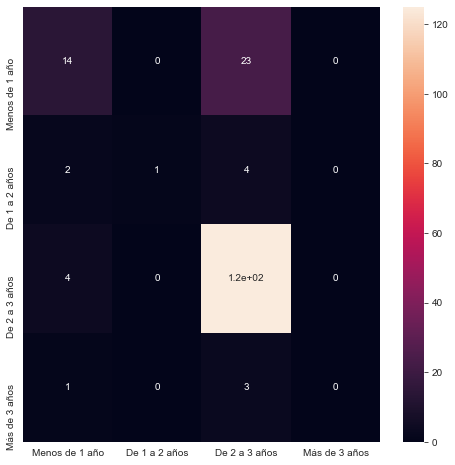

In [45]:
# Computamos la matriz de confusión

cm = confusion_matrix(ytest,ypred_knn2)

# Graficamos

df_cm = pd.DataFrame(cm, index=['Menos de 1 año','De 1 a 2 años', 'De 2 a 3 años','Más de 3 años'], 
                     columns=['Menos de 1 año','De 1 a 2 años', 'De 2 a 3 años','Más de 3 años'])
plt.figure(figsize=(8,8,))
sns.heatmap(df_cm, annot=True)
plt.show()

In [50]:
# Observamos el área bajo la curva

yproba=gs_knn2.predict_proba(xtest_scaled)
fpr1,tpr1,threshold=roc_curve(ytest.astype('int'),
                              yproba[:,1], drop_intermediate=False)
auc=metrics.auc(fpr1,tpr1)
print('El área bajo la curva es: '+ str(auc))

ValueError: multiclass format is not supported